# Load dữ liệu

In [1]:
import json
import pandas as pd

def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return pd.DataFrame(data).transpose()

# File paths
train_path = r"C:\Users\The Anh\OneDrive\Máy tính\Project\Data\vimmsd-train.json"

# Load data into DataFrames
df_train = load_json_to_dataframe(train_path)

In [2]:
test_path = r"C:\Users\The Anh\OneDrive\Máy tính\Project\Data\vimmsd-private-test.json"
df_test = load_json_to_dataframe(test_path)

# Model trích xuất đặc trưng

In [ ]:
from transformers import CLIPModel, CLIPProcessor

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Xử lý và lưu lại kết quả process

In [ ]:
import os
from PIL import Image
import torch
import numpy as np

# Path to the folder containing images
image_folder = r"C:\Users\The Anh\OneDrive\Máy tính\Project\Data\train-images"  # Adjust as necessary
# Loop through each image name in the DataFrame
img_names = df_train['image'].tolist()  # Convert Series to list


In [7]:
df_train.iloc[0]['image']

'8ae451edcd8ebf697f8763ece249115813149c55733bf8306b971210d48b15d3.jpg'

In [8]:
prompts = ["sarcasm", "not-sarcasm"]
def feat_img(image_name):
    im = Image.open(image_folder+'\\'+image_name)
    inputs = processor(text=prompts, images=[im], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        features = outputs.vision_model_output.last_hidden_state
        cls_vector = features[:, 0, :]
    return cls_vector

In [9]:
feat_img(df_train.iloc[0]['image'])

tensor([[-3.1736e-01,  2.1321e-01,  1.1440e-01,  2.9200e-01,  1.5575e-01,
          2.2407e-01, -3.8894e-02, -1.8066e-01, -2.8536e-01, -4.1254e-01,
          1.1642e-01, -1.4070e-01, -1.1909e-01, -5.7532e-01,  2.4463e-01,
         -5.8314e-02,  1.5521e-03, -2.7475e-01,  2.0782e-01,  1.5041e-01,
          1.8491e-01, -2.9213e-01,  4.6258e-02, -1.2479e-01, -3.0307e-01,
         -1.6011e-01,  2.2363e-01,  1.6475e-01, -5.6947e-02,  1.5474e-01,
         -2.4802e-01,  6.7802e-02, -2.4461e-01, -8.2598e-02, -4.9390e-01,
          1.6595e-01, -1.9696e-01, -2.6213e-01,  4.8073e-01, -3.1566e-01,
         -2.5003e-01,  2.0887e-01, -2.0201e-01,  4.1900e-01,  6.4778e-02,
          7.9499e-02, -1.2320e-01,  2.8674e-01, -5.9374e-02, -1.7787e-01,
         -7.0732e-02, -4.2548e-01,  2.0905e-01, -2.1717e-02,  1.7258e-01,
          2.8301e-01, -2.5922e-01,  6.7249e-02,  6.3073e-02,  1.9473e-01,
          7.6817e-02,  1.1730e-01, -1.1257e-01,  3.7268e-02, -3.5685e-01,
         -4.7917e-01, -3.7328e-01, -1.

In [ ]:
import csv
count=0

output_file = f'img_prtest.csv'

writer = csv.writer(open(output_file, 'w', newline='', encoding='utf-8'))
writer.writerow(['image', 'features'])  # Header

for name in img_names:  # Duyệt qua từng dòng của DataFrame
                features = feat_img(name)  # Giả sử bạn muốn xử lý cột 'features'
                tensor_list = features.flatten().tolist()
                writer.writerow([name, tensor_list])  # Lưu kết quả vào file
                print(count:=count+1)
           
        

In [ ]:
for i in range(1):       
        output_file = f'features_img_{i*2000}_{(i+1)*2000}.csv'

        writer = csv.writer(open(output_file, 'w', newline='', encoding='utf-8'))
        writer.writerow(['image', 'features'])  # Header

        for name in img_names:  # Duyệt qua từng dòng của DataFrame
                features = feat_img(name)  # Giả sử bạn muốn xử lý cột 'features'
                tensor_list = features.flatten().tolist()
                writer.writerow([name, tensor_list])  # Lưu kết quả vào file
        print(i)

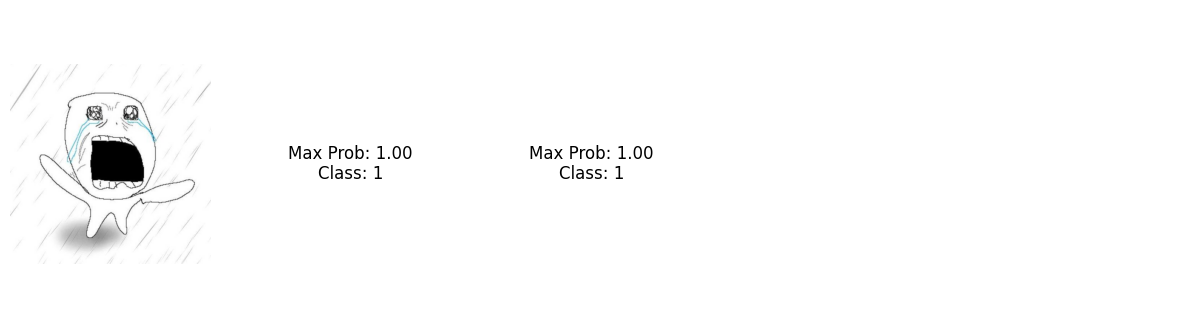

In [44]:
import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
    outputs = model(**inputs)

preds = outputs.logits_per_image.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(m)  # Hình ảnh gốc

# Hiển thị xác suất cao nhất cho mỗi lớp
for i in range(2):
    # Tính xác suất
    probabilities = torch.sigmoid(preds[i]).detach().numpy().flatten()
    
    # Lấy xác suất cao nhất và chỉ số của nó
    max_prob, max_index = torch.max(preds[i], dim=1)
    max_prob = torch.sigmoid(max_prob).item()  # Chuyển đổi thành giá trị Python

    # Hiển thị xác suất
    ax[i + 1].text(0.5, 0.5, f"Max Prob: {max_prob:.2f}\nClass: {max_index.item()}",
                   fontsize=12, ha='center', va='center')

plt.show()


In [ ]:
import csv

output_file = 'features_image.csv'
i=-1
with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['image', 'pixel_values ',''])  # Header
    for img_name in img_names[0]:
        image_path = os.path.join(image_folder + '\\'+img_names[0])  # Create the path to the image
        with Image.open(image_path) as image:  # Open the image
            # Convert to RGB if not already in that mode
            if image.mode != 'RGB':
                image = image.convert('RGB')
            # Process the image
            inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

            # Extract features (embedding) from the image
            with torch.no_grad():
                outputs = model(**inputs)
                
                #features = outputs.labels 
                print(outputs)
         